In [85]:
'''
This contains code for generating the following figures
    - "Evaluation of FACETs explanation analytics using COREX, our counterfactual region explanation index." 
    - "Evaluation of query response time with and without COREX, FACETs bit-vector based counterfactual region explanation index. Varying Nr, the number of indexed counterfactual regions.

Experiment results files needed: VaryNrects, VaryM

Results used in the paper are provided in "../results/final" if generating new results run each experiment and update the results paths below
'''
# path to each result file
path_nrects = '../results/vary_nrects_fig11.csv'
path_nrects_vs_linear = '../results/vary_nrects_fig12.csv'
path_m = "../results/vary_m_fig11.csv"

# path to output the figure
export_figures = True
output_dir = "./reproducibility/"
fig_save_name_1 = "index_evaluation_line_fig11"
fig_save_name_2 = "index_evaluation_bar_fig12"
fig_type = ".pdf"

In [86]:
import os
import re
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import axis

sys.path.append(os.path.abspath("../"))
plot_fontsize = 20
if export_figures and not os.path.isdir(output_dir):
    os.makedirs(output_dir)

In [87]:
# load the results of vary_nrects for FACET w/bitvector index
nrects_results = pd.read_csv(path_nrects).groupby(["dataset", "explainer", "n_rects"]).mean().reset_index()
print("datasets", list(nrects_results["dataset"].unique()))
# drop rows we don't want for clarity
nrects_keep = [1000, 5000, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000]
nrects_results = nrects_results[nrects_results["n_rects"].isin(nrects_keep)]
nrects_results.head()

datasets ['adult', 'cancer', 'compas', 'credit', 'glass', 'magic', 'spambase', 'vertebral']


,dataset,explainer,n_rects,n_trees,max_depth,iteration,accuracy,precision,recall,f1,per_valid,avg_dist,avg_manhattan,avg_length,prep_time,explain_time,sample_time,n_explain
0,adult,FACET,1000,10.0,3.0,0.0,0.817137,0.811299,0.325624,0.464725,1.0,0.807627,1.270624,3.7,0.228088,0.107769,0.005388,20.0
1,adult,FACET,5000,10.0,3.0,0.0,0.817137,0.811299,0.325624,0.464725,1.0,0.497517,0.711699,3.2,0.779521,0.211472,0.010574,20.0
2,cancer,FACET,1000,10.0,3.0,0.0,0.938596,0.950000,0.883721,0.915663,1.0,0.192158,0.403751,5.7,0.197203,0.055663,0.002783,20.0
3,cancer,FACET,5000,10.0,3.0,0.0,0.938596,0.950000,0.883721,0.915663,1.0,0.171689,0.348270,5.4,0.844982,0.122439,0.006122,20.0
4,compas,FACET,1000,10.0,3.0,0.0,0.637311,0.589583,0.603412,0.596417,1.0,0.260062,0.262500,1.1,0.138151,0.034677,0.001734,20.0


In [88]:
# load the results of vary_m
m_results = pd.read_csv(path_m).groupby(["dataset", "explainer", "facet_m"]).mean().reset_index()
print("datasets", list(nrects_results["dataset"].unique()))
m_results.head()

datasets ['adult', 'cancer', 'compas', 'credit', 'glass', 'magic', 'spambase', 'vertebral']


,dataset,explainer,facet_m,n_trees,max_depth,iteration,index_time,accuracy,precision,recall,f1,per_valid,avg_dist,avg_length,prep_time,explain_time,sample_time,n_explain
0,adult,FACET,2,10.0,3.0,0.0,0.061315,0.817137,0.811299,0.325624,0.464725,1.0,0.424962,3.25,6.623743,0.413935,0.020697,20.0
1,adult,FACET,3,10.0,3.0,0.0,0.083375,0.817137,0.811299,0.325624,0.464725,1.0,0.424962,3.25,6.623743,0.425673,0.021284,20.0
2,cancer,FACET,2,10.0,3.0,0.0,0.752476,0.938596,0.950000,0.883721,0.915663,1.0,0.151358,4.75,2.464147,0.424056,0.021203,20.0
3,cancer,FACET,3,10.0,3.0,0.0,0.691178,0.938596,0.950000,0.883721,0.915663,1.0,0.151358,4.75,2.464147,0.288895,0.014445,20.0
4,compas,FACET,2,10.0,3.0,0.0,0.003000,0.637311,0.589583,0.603412,0.596417,1.0,0.257562,1.10,2.658858,0.041141,0.002057,20.0


In [89]:
cmap = plt.get_cmap("tab10")
colors = cmap.colors
ds_colors = {
    "adult": colors[0],
    "cancer": colors[1],
    "credit": colors[2],
    "magic": colors[3],
    "spambase": colors[4],
    "compas": colors[0],
    "glass": colors[1],
    "vertebral": colors[2],
}
ds_markers = {
    "adult": "^",
    "cancer": "o",
    "credit": "v",
    "magic": "s",
    "spambase": "D",
    "compas": "^",
    "glass": "o",
    "vertebral": "v",
}
marker_size = 10
line_width = 4
marker_sizes = {
    "adult": marker_size,
    "cancer": marker_size,
    "credit": marker_size,
    "magic": marker_size,
    "spambase": marker_size,
    "compas": marker_size,
    "glass": marker_size,
    "vertebral": marker_size
}
nrects_pretty = {
    0: "0",
    100: "0.1",
    1000: "1",
    5000: "5",
    10000: "10",
    20000: "20",
    30000: "30",
    40000: "40",
    50000: "50",
    60000: "60",
    70000: "70",
    80000: "80",
    90000: "90",
    100000: "100",
}

In [90]:
results_dict = {
    "n_rects": nrects_results,
    "facet_m": m_results
}

def render_plot_ax(datasets, xfeats, yfeats, xlabels=None, ylabels=None, save_name=None, xrange=None, yrange=None, xlog=False, lloc=None, ylog=False, yticks_multi=None, yrange_multi=None, ytick_format="{:.2f}", titles=None):
    #datasets = results_dict[xfeats[0]]["dataset"].unique()
    #datasets = [dataset1, dataset2, dataset3]
    fig = plt.figure(figsize=[32, 4])
    ax = fig.subplots(nrows=1, ncols=5)
    
    for i in range(len(yfeats)):
        xfeature = xfeats[i]
        yfeature =  yfeats[i]
        for ds in datasets:
            is_ds = results_dict[xfeature]["dataset"] == ds
            matching_rows = is_ds

            xvals = results_dict[xfeature][matching_rows][xfeature]
            if xfeature == "n_rects":
                xvals = [nrects_pretty[_] for _ in xvals]

            ax[i].plot(xvals, results_dict[xfeature][matching_rows][yfeature], label=yfeature, marker=ds_markers[ds], lw=line_width, ms=marker_size)
            
            ax[i].tick_params(axis='both', which='major', labelsize=plot_fontsize)
            if xfeature == "n_rects":
                ax[i].set_xticks(xvals)
                xtick_labels = [str(_) for _ in xvals]
                ax[i].set_xticklabels(xtick_labels, fontdict={"horizontalalignment": "center"}, rotation=90)
            if titles is not None:
                ax[i].set_title("({:s}) {:s}".format(chr(ord('a')+i), titles[i]), fontdict={"fontsize": plot_fontsize}) 
            if ylabels is not None:
                ax[i].set_ylabel(ylabels[i], fontdict={"fontsize": plot_fontsize})
            if xlabels is not None:
                ax[i].set_xlabel(xlabels[i], fontdict={"fontsize": plot_fontsize})
            ax[i].set_xlim(xrange)
            if yticks_multi is not None:
                ax[i].set_yticks(yticks_multi[i])
                ax[i].set_yticklabels([ytick_format.format(_) for _ in yticks_multi[i]])
            if yrange_multi is not None:
                bottom = yrange_multi[i][0]
                top = yrange_multi[i][1]
                if bottom is not None:
                    ax[i].set_ylim(bottom=bottom)
                if top is not None:
                    ax[i].set_ylim(top=top)

    lines, labels = ax[0].get_legend_handles_labels()
    fig.subplots_adjust(wspace=0.18)
    legend_labels = [datasets[_].upper() for _ in range(len(datasets))]
    fig.legend(lines, legend_labels, loc="upper center", bbox_to_anchor=(0.51, 1.14), handletextpad=0.5, columnspacing=1, handlelength=1.5, prop={"size": plot_fontsize}, ncol=len(legend_labels))
    if save_name is not None:
        fig.savefig(output_dir + save_name + fig_type, bbox_inches="tight", facecolor='w')

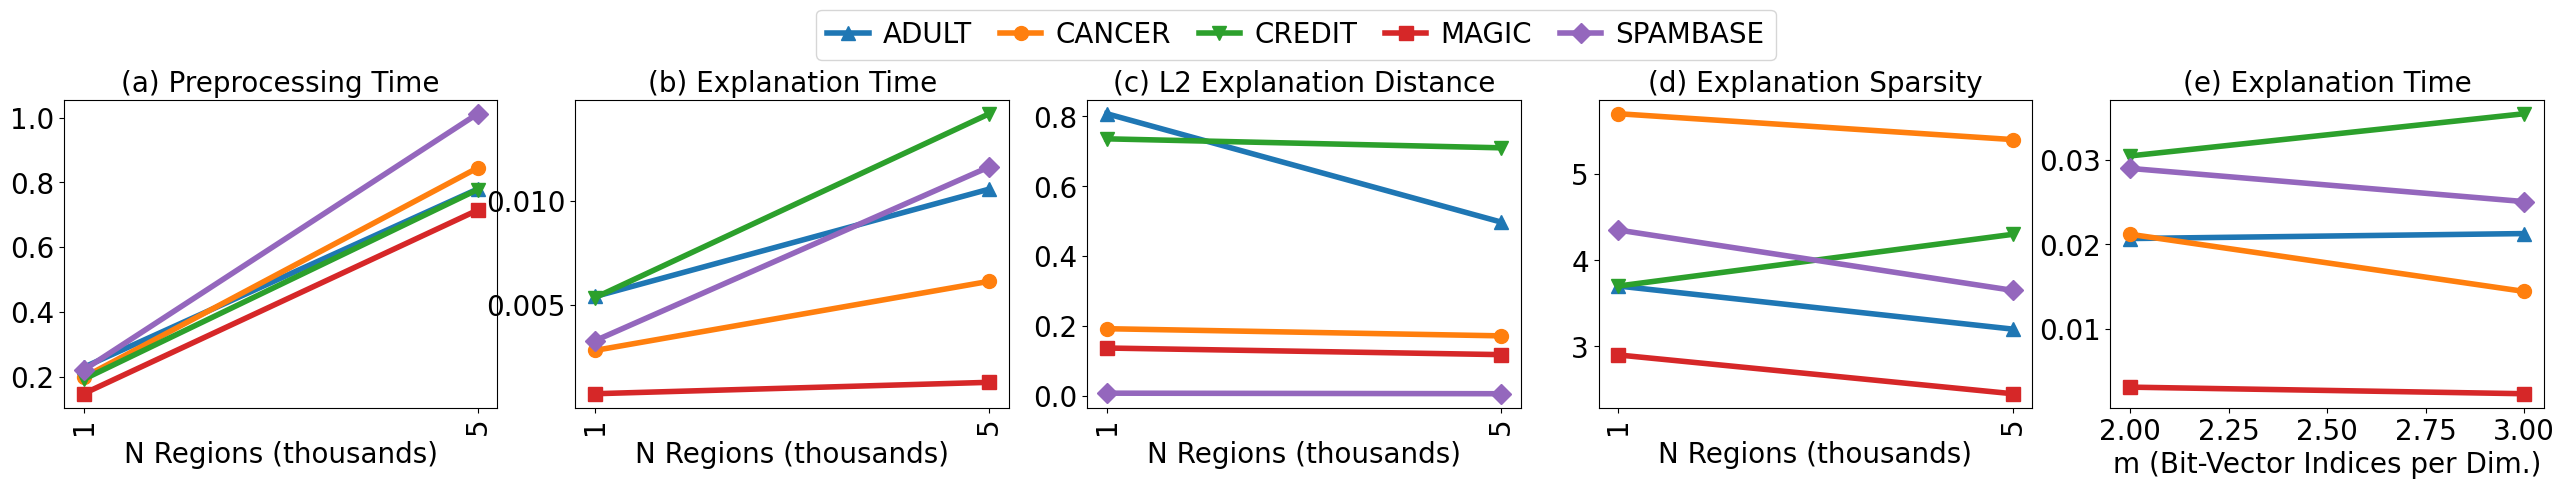

In [91]:
# ########## MAIN PAPER DATASETS - VARYNRECTS AND M
datasets = ["adult", "cancer", "credit", "magic", "spambase"]
# axis features and  labels
ylabels = ["Preprocessing Time", "Explanation Time", "L2 Explanation Distance", "Explanation Sparsity", "Explanation Time"]
xlabels = ["N Regions (thousands)", "N Regions (thousands)", "N Regions (thousands)", "N Regions (thousands)", "m (Bit-Vector Indices per Dim.)"]
titles = ["Preproc Time vs N Regions", "Expl Time vs N Regions", "Expl Time vs N Regions", "Expl Sparsity vs N Regions", "Expl Timve vs m"]
xfeats = ["n_rects", "n_rects", "n_rects", "n_rects", "facet_m"]
yfeats = ["prep_time", "sample_time", "avg_dist", "avg_length", "sample_time"]
# create the plot
render_plot_ax(datasets, xfeats=xfeats, yfeats=yfeats, ylabels=None, xlabels=xlabels, titles=ylabels, save_name=fig_save_name_1)

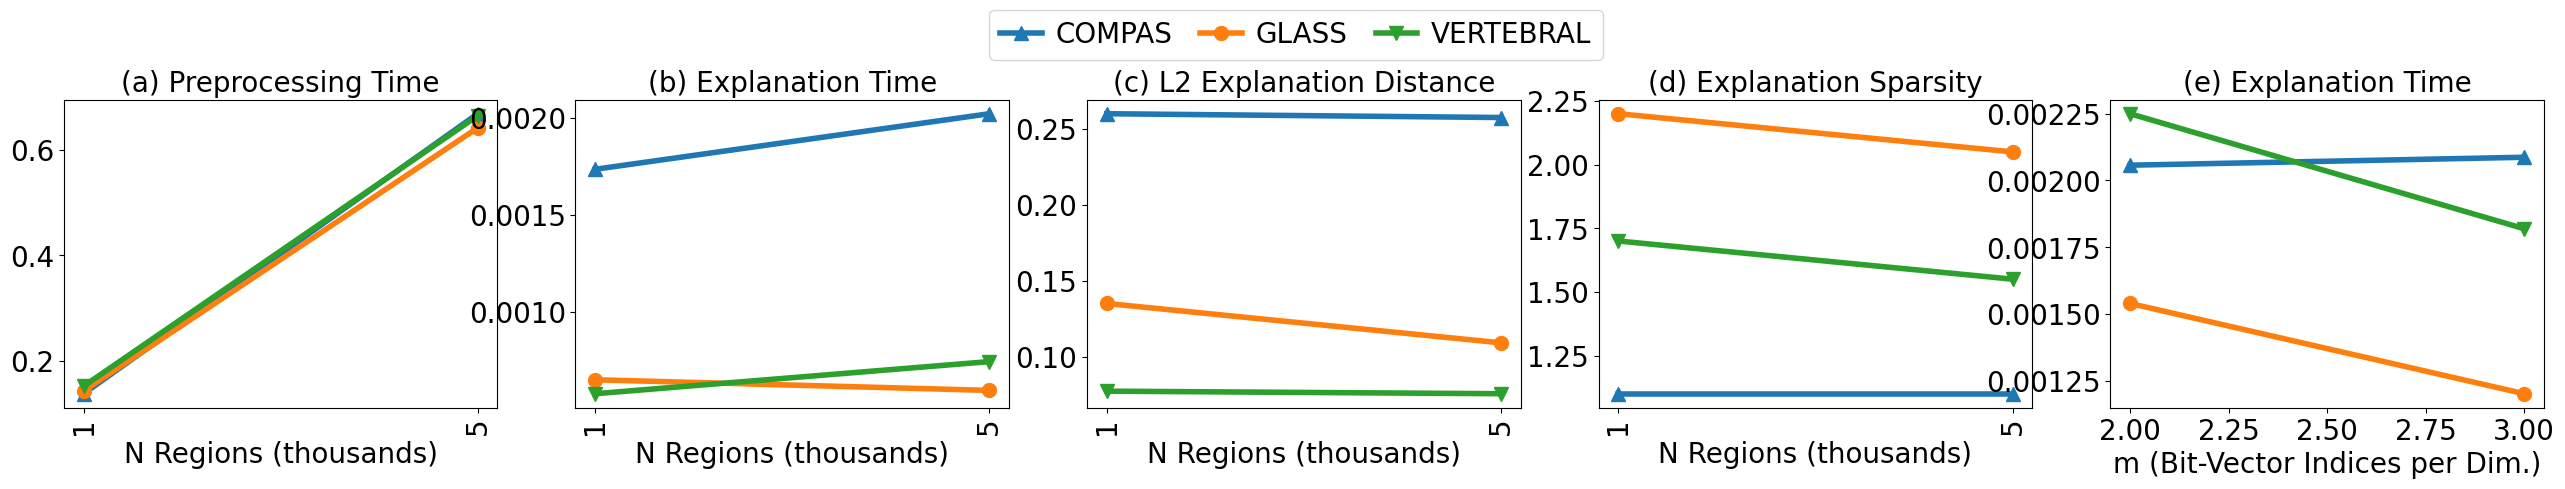

In [92]:
# ########## APPENDIX DATASETS - VARYNRECTS AND M
datasets_apdx = ["compas", "glass", "vertebral"]
# axis features and  labels
ylabels = ["Preprocessing Time", "Explanation Time", "L2 Explanation Distance", "Explanation Sparsity", "Explanation Time"]
xlabels = ["N Regions (thousands)", "N Regions (thousands)", "N Regions (thousands)", "N Regions (thousands)", "m (Bit-Vector Indices per Dim.)"]
titles = ["Preproc Time vs N Regions", "Expl Time vs N Regions", "Expl Time vs N Regions", "Expl Sparsity vs N Regions", "Expl Timve vs m"]
xfeats = ["n_rects", "n_rects", "n_rects", "n_rects", "facet_m"]
yfeats = ["prep_time", "sample_time", "avg_dist", "avg_length", "sample_time"]
# create the plot
render_plot_ax(datasets_apdx, xfeats=xfeats, yfeats=yfeats, ylabels=None, xlabels=xlabels, titles=ylabels, save_name=fig_save_name_1 + "_apdx")

In [93]:
# load the results of vary_nrects comparing FACET's bitvector to a simple linear scan
nrects_vs_linear = pd.read_csv(path_nrects_vs_linear).groupby(["dataset", "explainer", "n_rects", "facet_search"]).mean().reset_index()
print("datasets", list(nrects_vs_linear["dataset"].unique()))
nrects_vs_linear.head()
# drop rows we don't want for clarity
nrects_keep = [1000, 5000, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000]
nrects_vs_linear = nrects_vs_linear[nrects_vs_linear["n_rects"].isin(nrects_keep)]
linear_results = nrects_vs_linear[nrects_vs_linear["facet_search"] == "Linear"]
bitvector_results = nrects_vs_linear[nrects_vs_linear["facet_search"] == "BitVector"]
nrects_vs_linear.head()

datasets ['adult', 'cancer', 'compas', 'credit', 'glass', 'magic', 'spambase', 'vertebral']


,dataset,explainer,n_rects,facet_search,n_trees,max_depth,iteration,accuracy,precision,recall,f1,per_valid,avg_dist,avg_manhattan,avg_length,prep_time,explain_time,sample_time,n_explain
0,adult,FACET,1000,BitVector,10.0,3.0,0.0,0.817137,0.811299,0.325624,0.464725,1.0,0.807627,1.270624,3.7,0.190244,0.100377,0.005019,20.0
1,adult,FACET,1000,Linear,10.0,3.0,0.0,0.817137,0.811299,0.325624,0.464725,1.0,0.807627,1.270624,3.7,0.187196,0.099861,0.004993,20.0
2,adult,FACET,5000,BitVector,10.0,3.0,0.0,0.817137,0.811299,0.325624,0.464725,1.0,0.497517,0.711699,3.2,0.748043,0.232771,0.011639,20.0
3,adult,FACET,5000,Linear,10.0,3.0,0.0,0.817137,0.811299,0.325624,0.464725,1.0,0.497517,0.711699,3.2,0.755036,0.227917,0.011396,20.0
4,cancer,FACET,1000,BitVector,10.0,3.0,0.0,0.938596,0.950000,0.883721,0.915663,1.0,0.192158,0.403751,5.7,0.128749,0.084832,0.004242,20.0


In [94]:
def render_bar_ax(datasets, xfeature, yfeature, xlabel, ylabel, title, save_name=None, xrange=None, yrange=None, xlog=False, lloc=None, ylog=False, yticks_multi=None, yrange_multi=None, ytick_format="{:.2f}"):
    print(datasets)
    fig = plt.figure(figsize=[2 + 5*len(datasets), 3.8])
    ax = fig.subplots(nrows=1, ncols=len(datasets), sharex="all") #nrows=1, ncols=5, sharex="all")
    fig.subplots_adjust(left=0.2)
       
    for i in range(len(datasets)):
        ds = datasets[i]
                
        bitvector_match = (bitvector_results["dataset"] == ds) & (bitvector_results["explainer"] == "FACET")
        linear_match = (linear_results["dataset"] == ds) & (linear_results["explainer"] == "FACET")
        data1 = bitvector_results[bitvector_match][yfeature]
        data2 = linear_results[linear_match][yfeature]
        width =0.3
        ax[i].bar(np.arange(len(data1)), data1, width=width, )
        ax[i].bar(np.arange(len(data2))+ width, data2, width=width)
        
        xticks = [_ + width/2 for _ in range(len(linear_results[linear_match]["n_rects"]))]
        ax[i].set_xticks(xticks,)
        xtick_labels = [nrects_pretty[_] for _ in linear_results[linear_match]["n_rects"]]
        ax[i].set_xticklabels(xtick_labels, rotation=90, fontdict={"horizontalalignment": "center"})        
        ax[i].tick_params(axis='both', which='major', labelsize=plot_fontsize)
        
        ax[i].set_title("({:s}) {:s}".format(chr(ord('a')+i), datasets[i].upper()), fontdict={"fontsize": plot_fontsize}) 
        if xrange is not None:
            ax[i].set_xlim(xrange)
        if yticks_multi is not None:
            ax[i].set_yticks(yticks_multi[i])
            ax[i].set_yticklabels([ytick_format.format(_) for _ in yticks_multi[i]])
        if yrange_multi is not None:
            bottom = yrange_multi[i][0]
            top = yrange_multi[i][1]
            if bottom is not None:
                ax[i].set_ylim(bottom=bottom)
            if top is not None:
                ax[i].set_ylim(top=top)

    ax[0].set_ylabel(ylabel, fontsize=plot_fontsize)
    
    fig.subplots_adjust(wspace=0.22)
    legend_labels = ["FACET COREX", "FACET Linear Scan"]
    fig.legend(labels=legend_labels, loc="upper center", handletextpad=0.5, columnspacing=1, handlelength=1.5, prop={"size": plot_fontsize}, bbox_to_anchor=(0.55, 1.15), ncol=len(legend_labels))
    if save_name is not None:
        fig.savefig(output_dir + save_name + fig_type, bbox_inches="tight", facecolor='w')

['adult', 'cancer', 'credit', 'magic', 'spambase']


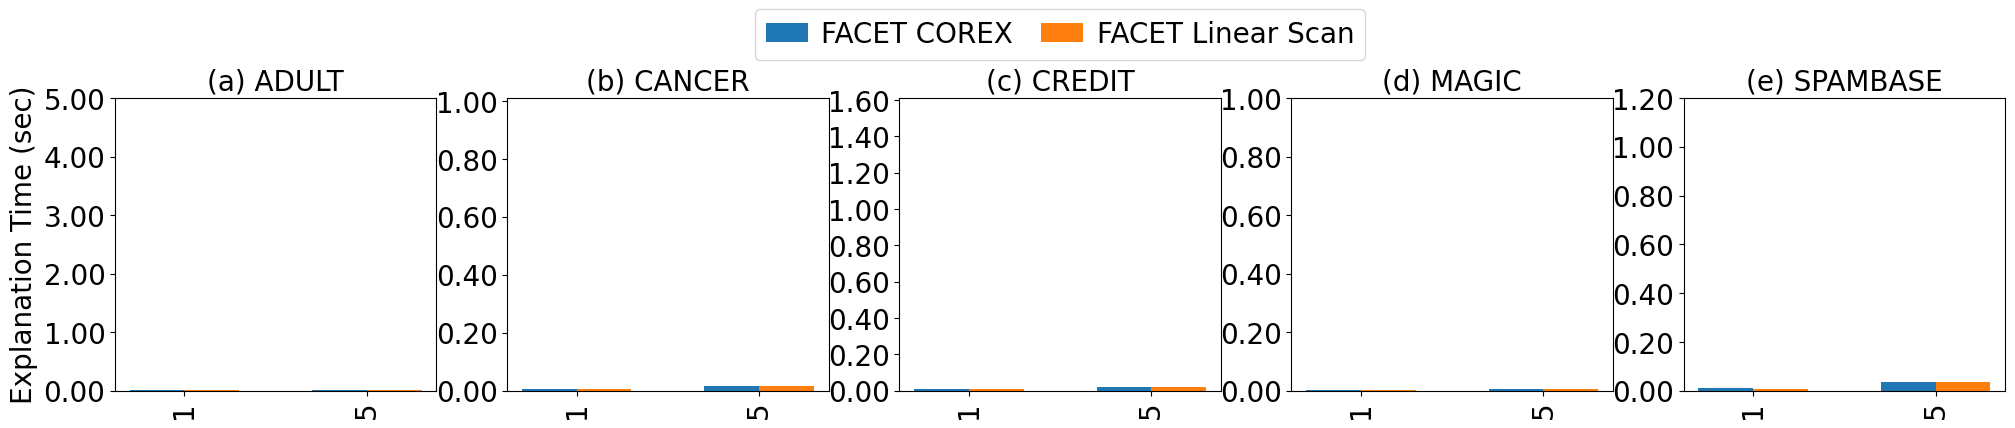

In [95]:
# ########## MAIN PAPER DATASETS - COMPARING LINEAR TO BITVECTOR
datasets = ["adult", "cancer", "credit", "magic", "spambase"]
yticks_multi = [np.arange(0.0, 5.5, 1), np.arange(0.0, 1.02, 0.2), np.arange(0.0, 1.8, 0.2),
                np.arange(0, 1.3, 0.2), np.arange(0.0, 1.5, 0.2)]
yrange_multi = [[0.0, 5.0001], [0.0, 1.01], [0.0, 1.61], [0.0, 1], [0.0, 1.2]]
render_bar_ax(datasets, xfeature="n_rects", yfeature="sample_time", xlabel="N Regions (thousands)", ylabel="Explanation Time (sec)", title="Explanation Time vs NRegions", save_name=fig_save_name_2, yrange_multi=yrange_multi, yticks_multi=yticks_multi)

['compas', 'glass', 'vertebral']


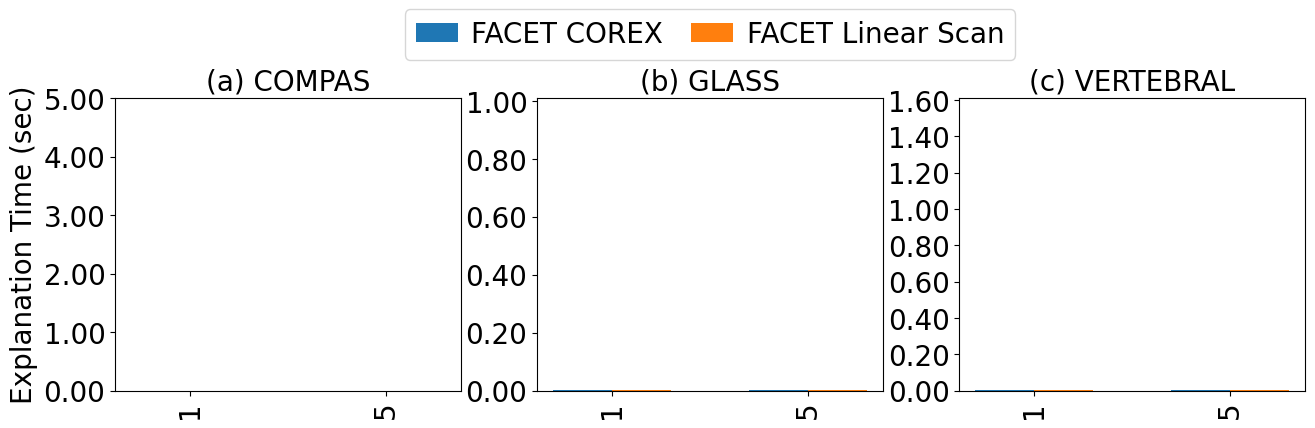

In [96]:
# ########## APPENDIX DATASETS - COMPARING LINEAR TO BITVECTOR
datasets = ["compas", "glass", "vertebral"]
yticks_multi = [np.arange(0.0, 5.5, 1), np.arange(0.0, 1.02, 0.2), np.arange(0.0, 1.8, 0.2),
                np.arange(0, 1.3, 0.2), np.arange(0.0, 1.5, 0.2)]
yrange_multi = [[0.0, 5.0001], [0.0, 1.01], [0.0, 1.61], [0.0, 1], [0.0, 1.2]]
render_bar_ax(datasets, xfeature="n_rects", yfeature="sample_time", xlabel="N Regions (thousands)", ylabel="Explanation Time (sec)", title="Explanation Time vs NRegions", save_name=fig_save_name_2, yrange_multi=yrange_multi, yticks_multi=yticks_multi)